Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Load Data

In [4]:

weekly = pd.read_csv("Weekly.csv")

print(weekly.head())
print()
print(weekly.dtypes)
print()
print(weekly.isna().sum())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64


Part A

Histograms of numerics: can ignore year histogram, but all other histograms have a normal distribution. However, histogram of volume shows severe right skew.

Bar chart of categorical: Up has about 100 more instances than down

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


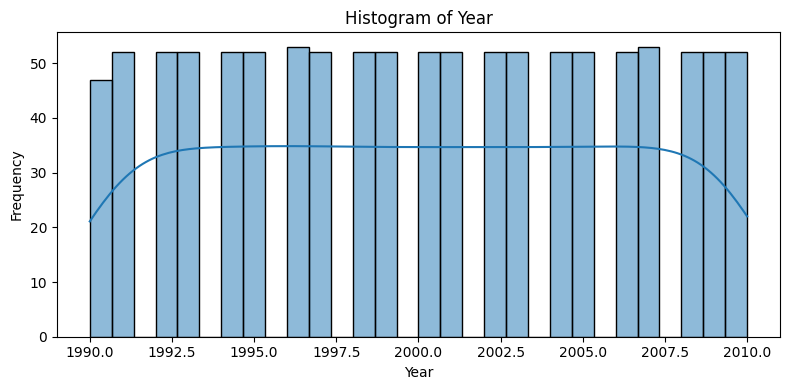

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


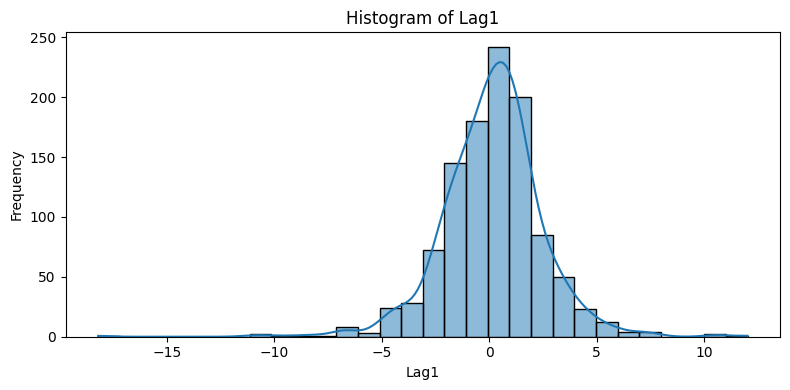

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


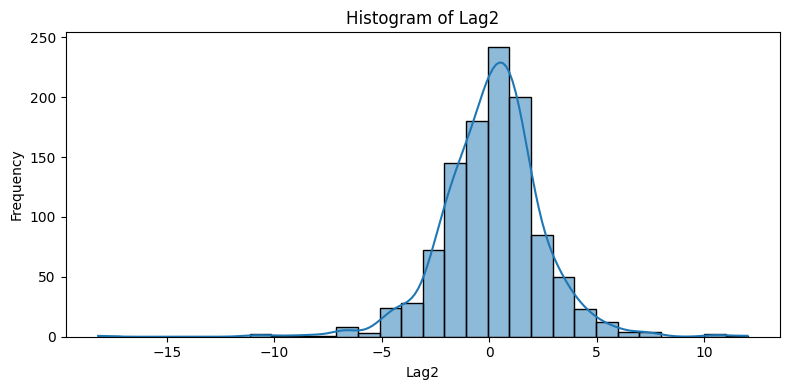

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


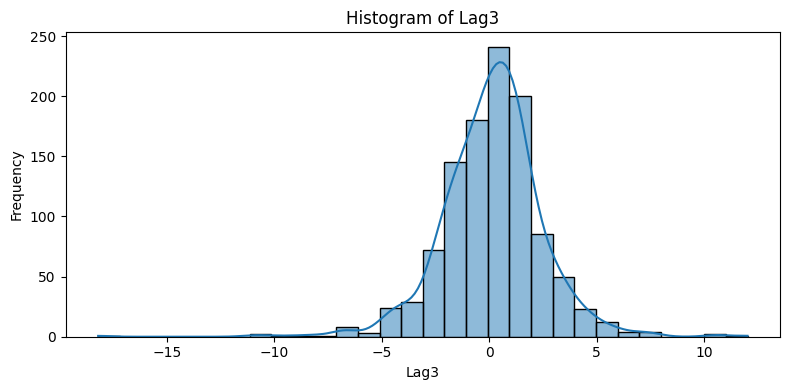

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


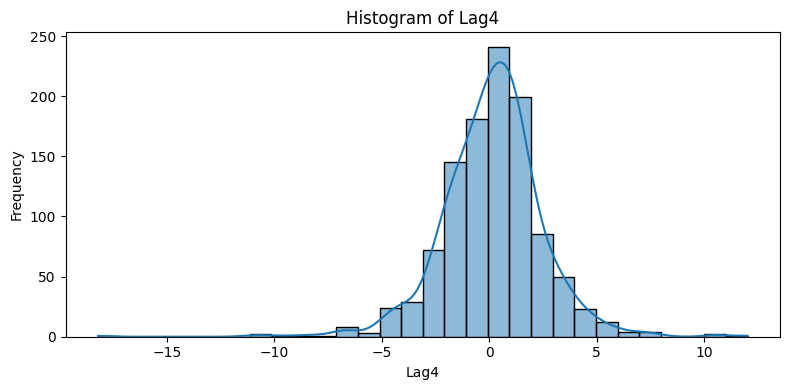

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


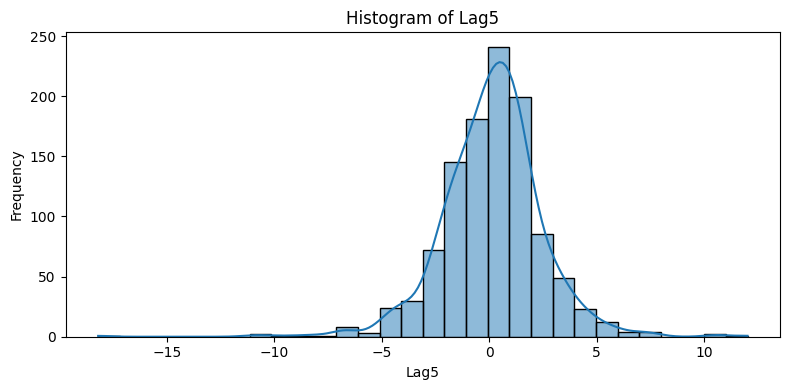

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


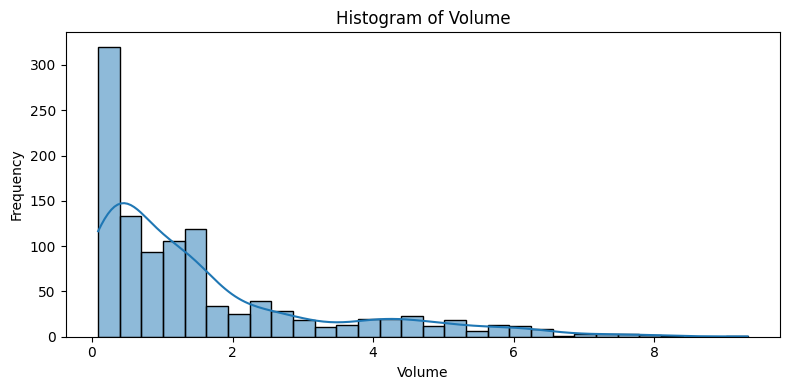

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


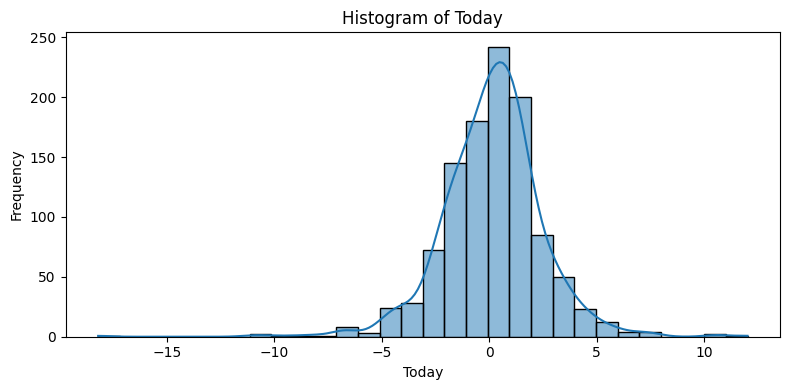

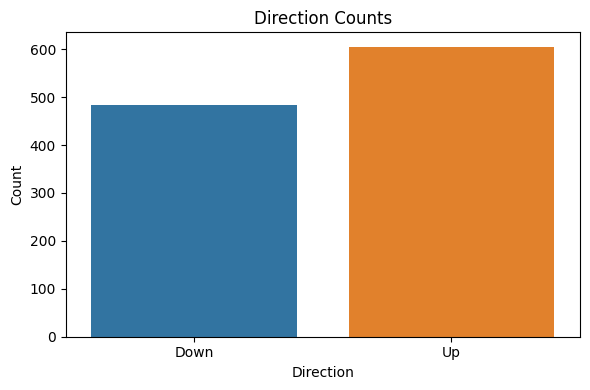

In [5]:
numeric_cols = weekly.select_dtypes(include='number')


for column in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(weekly[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Direction', data=weekly)
plt.title('Direction Counts')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Part B: Using all lags and volume to predict direction with logistic regression. Lag 2 seems to be the only statistically significant predictor of direction. All others have p-values greater than 0.05.

In [6]:

X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly['Direction'].map({'Up': 1, 'Down': 0})  

X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                0.006580
Time:                        04:03:20   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Part C: confusion matrix and overall fraction of correct predictions

High false positive of 430: predicted up, but was actually down

High true positive of 557: predicts up, and is actually up.

This model appears to prioritize up predictions whether correct or not.

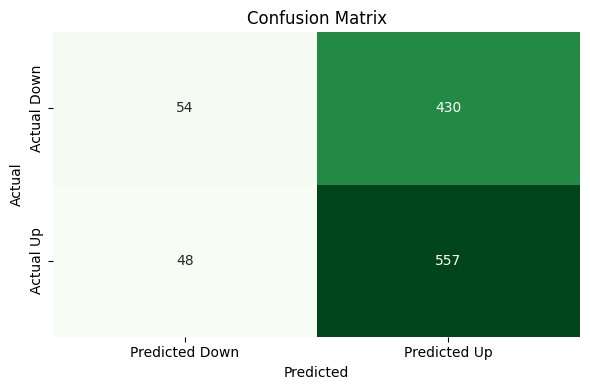


Overall Fraction of Correct Predictions (Accuracy): 0.5610651974288338


In [7]:
# Predict probabilities
pred_probs = model.predict(X)

pred_class = np.where(pred_probs > 0.5, 1, 0)

# conf matrix
conf_matrix = confusion_matrix(y, pred_class)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Down', 'Predicted Up'],
            yticklabels=['Actual Down', 'Actual Up'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

#Accuracy
accuracy = accuracy_score(y, pred_class)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)






Part D: Logistic reg with only Lag2 for years 1990 - 2008, then evaluate performance on holdout data 2009-2010

In [8]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction'].map({'Up': 1, 'Down': 0})


X_train = sm.add_constant(X_train)

# Fit logistic regression 
model = sm.Logit(y_train, X_train).fit()

X_test = test[['Lag2']]
y_test = test['Direction'].map({'Up': 1, 'Down': 0})
X_test = sm.add_constant(X_test)

# Predict probabilities and classify
y_pred_probs = model.predict(X_test)
y_pred_class = np.where(y_pred_probs > 0.5, 1, 0)

# Conf matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data:", accuracy)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix:
 [[ 9 34]
 [ 5 56]]

Accuracy on 2009–2010 Holdout Data: 0.625


Part E: LDA

In [9]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction']

X_test = test[['Lag2']]
y_test = test['Direction']

# Fit LDA 
lda = LDA()
lda.fit(X_train, y_train)

# Predict on test 
y_pred = lda.predict(X_test)

# Conf matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (LDA):", accuracy)


Confusion Matrix:
 [[ 9 34]
 [ 5 56]]

Accuracy on 2009–2010 Holdout Data (LDA): 0.625


Part F:QDA

In [10]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction']

X_test = test[['Lag2']]
y_test = test['Direction']

# Fit QDA 
qda = QDA()
qda.fit(X_train, y_train)

# Predict on test 
y_pred = qda.predict(X_test)

# Conf matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (QDA):", accuracy)


Confusion Matrix:
 [[ 0 43]
 [ 0 61]]

Accuracy on 2009–2010 Holdout Data (QDA): 0.5865384615384616


Part G: KNN with K=1

In [11]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction']

X_test = test[['Lag2']]
y_test = test['Direction']

# Fit KNN with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on test 
y_pred = knn.predict(X_test)

# Conf matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (KNN, K=1):", accuracy)


Confusion Matrix:
 [[22 21]
 [30 31]]

Accuracy on 2009–2010 Holdout Data (KNN, K=1): 0.5096153846153846


Part H: Naive Bayes

In [12]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

X_train = train[['Lag2']]
y_train = train['Direction']

X_test = test[['Lag2']]
y_test = test['Direction']

# Fit Naive Bayes 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test 
y_pred = nb.predict(X_test)

# Conf matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (Naive Bayes):", accuracy)


Confusion Matrix:
 [[ 0 43]
 [ 0 61]]

Accuracy on 2009–2010 Holdout Data (Naive Bayes): 0.5865384615384616


Part I: Logit and LDA perform best based on accuracy. Tied score of 62.5%

In [13]:
#Creating a summary chart
models = [
    ("Logit", model),
    ("LDA", lda),
    ("QDA", qda),
    ("KNN (K=1)", knn),
    ("Naive Bayes", nb)
]

results = []

for name, m in models:
    if name == "Logit":
        X_test_logit = sm.add_constant(X_test, has_constant='add')
        y_pred_probs = m.predict(X_test_logit)
        y_pred = np.where(y_pred_probs > 0.5, "Up", "Down")  
    else:
        y_pred = m.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Confusion Matrix": cm
    })

summary_df = pd.DataFrame(results)

print(summary_df)



         Model  Accuracy      Confusion Matrix
0        Logit    0.6250    [[9, 34], [5, 56]]
1          LDA    0.6250    [[9, 34], [5, 56]]
2          QDA    0.5865    [[0, 43], [0, 61]]
3    KNN (K=1)    0.5096  [[22, 21], [30, 31]]
4  Naive Bayes    0.5865    [[0, 43], [0, 61]]


Part j: Experimenting with Lag2 and Volume. Added an interaction Lag2*Volume. This produces similar results as models above, however, it lowers the overall accuracies.

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

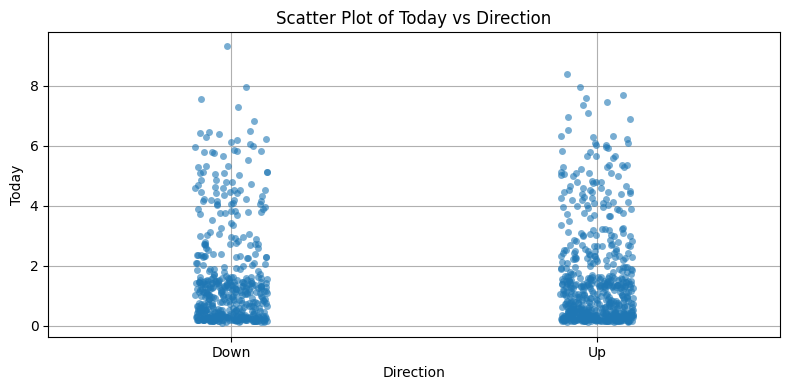

In [14]:

plt.figure(figsize=(8, 4))
sns.stripplot(y='Volume', x='Direction', data=weekly, alpha=0.6)

plt.title('Scatter Plot of Today vs Direction')
plt.ylabel('Today')
plt.xlabel('Direction')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

train['Lag2_Volume'] = train['Lag2'] * train['Volume']
test['Lag2_Volume'] = test['Lag2'] * test['Volume']

X_train = train[['Lag2', 'Volume','Lag2_Volume']]
y_train = train['Direction'].map({'Up': 1, 'Down': 0})

X_train = sm.add_constant(X_train)

model = sm.Logit(y_train, X_train).fit()

X_test = test[['Lag2', 'Volume','Lag2_Volume']]
y_test = test['Direction'].map({'Up': 1, 'Down': 0})
X_test = sm.add_constant(X_test)

y_pred_probs = model.predict(X_test)
y_pred_class = np.where(y_pred_probs > 0.5, 1, 0)

conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009 - 2010 Holdout Data:", accuracy)

Optimization terminated successfully.
         Current function value: 0.684965
         Iterations 4
Confusion Matrix:
 [[20 23]
 [25 36]]

Accuracy on 2009 - 2010 Holdout Data: 0.5384615384615384


C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3690220002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag2_Volume'] = train['Lag2'] * train['Volume']
C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3690220002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag2_Volume'] = test['Lag2'] * test['Volume']


LDA

In [17]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

train['Lag2_Volume'] = train['Lag2'] * train['Volume']
test['Lag2_Volume'] = test['Lag2'] * test['Volume']

X_train = train[['Lag2', 'Volume','Lag2_Volume']]
y_train = train['Direction']

X_test = test[['Lag2', 'Volume','Lag2_Volume']]
y_test = test['Direction']

lda = LDA()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (LDA):", accuracy)

Confusion Matrix:
 [[20 23]
 [25 36]]

Accuracy on 2009–2010 Holdout Data (LDA): 0.5384615384615384


C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\166699815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag2_Volume'] = train['Lag2'] * train['Volume']
C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\166699815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag2_Volume'] = test['Lag2'] * test['Volume']


QDA

In [18]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

train['Lag2_Volume'] = train['Lag2'] * train['Volume']
test['Lag2_Volume'] = test['Lag2'] * test['Volume']

X_train = train[['Lag2', 'Volume','Lag2_Volume']]
y_train = train['Direction']

X_test = test[['Lag2', 'Volume','Lag2_Volume']]
y_test = test['Direction']

qda = QDA()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (QDA):", accuracy)


Confusion Matrix:
 [[37  6]
 [49 12]]

Accuracy on 2009–2010 Holdout Data (QDA): 0.47115384615384615


C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\534591566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag2_Volume'] = train['Lag2'] * train['Volume']
C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\534591566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag2_Volume'] = test['Lag2'] * test['Volume']


KNN K=2

In [19]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

train['Lag2_Volume'] = train['Lag2'] * train['Volume']
test['Lag2_Volume'] = test['Lag2'] * test['Volume']

X_train = train[['Lag2', 'Volume','Lag2_Volume']]
y_train = train['Direction']

X_test = test[['Lag2', 'Volume','Lag2_Volume']]
y_test = test['Direction']

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (KNN, K=1):", accuracy)

Confusion Matrix:
 [[34  9]
 [43 18]]

Accuracy on 2009–2010 Holdout Data (KNN, K=1): 0.5


C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3518580328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag2_Volume'] = train['Lag2'] * train['Volume']
C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3518580328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag2_Volume'] = test['Lag2'] * test['Volume']


Naive Bayes

In [20]:

train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] >= 2009]

train['Lag2_Volume'] = train['Lag2'] * train['Volume']
test['Lag2_Volume'] = test['Lag2'] * test['Volume']

X_train = train[['Lag2', 'Volume','Lag2_Volume']]
y_train = train['Direction']

X_test = test[['Lag2', 'Volume','Lag2_Volume']]
y_test = test['Direction']

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy on 2009–2010 Holdout Data (Naive Bayes):", accuracy)

Confusion Matrix:
 [[42  1]
 [57  4]]

Accuracy on 2009–2010 Holdout Data (Naive Bayes): 0.4423076923076923


C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3838308937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Lag2_Volume'] = train['Lag2'] * train['Volume']
C:\Users\jacob\AppData\Local\Temp\ipykernel_68212\3838308937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Lag2_Volume'] = test['Lag2'] * test['Volume']


Evaluation

In [22]:
# Creating summary table
models = [
    ("Logit", model),
    ("LDA", lda),
    ("QDA", qda),
    ("KNN (K=2)", knn),
    ("Naive Bayes", nb)
]


results = []

for name, m in models:
    if name == "Logit":
        X_test_logit = sm.add_constant(X_test, has_constant='add')
        y_pred_probs = m.predict(X_test_logit)
        y_pred = np.where(y_pred_probs > 0.5, "Up", "Down")  
    else:
        y_pred = m.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Confusion Matrix": cm
    })

summary_df = pd.DataFrame(results)

print(summary_df)


         Model  Accuracy      Confusion Matrix
0        Logit    0.5385  [[20, 23], [25, 36]]
1          LDA    0.5385  [[20, 23], [25, 36]]
2          QDA    0.4712   [[37, 6], [49, 12]]
3    KNN (K=2)    0.5000   [[34, 9], [43, 18]]
4  Naive Bayes    0.4423    [[42, 1], [57, 4]]
